# **BELAJAR MACHINE LEARNING TERAPAN : RECOMMENDATION PROJECT**

# **DATA DIRI**

* Nama      : Karlina Surya Witanto
* ID        : M014V6051
* PT        : Universitas Udayana
* Email     : gabriella.linatan@gmail.com

## Project Overview
Film merupakan sebuah hiburan yang banyak diminati oleh masyarakat dari berbagai kalangan, salah satunya anime movie. Banyaknya genre dari suatu film membuat
para penonton bingung untuk menentukan film apa yang ingin ditontonnya, seringkali mereka random menonton karena tidak ada informasi terkait film tersebut sebelumnya.
Tidak jarang seseorang yang ingin menonton film menjadi kebingungan karena terlalu banyak film yang tersedia di internet. Oleh karena itu, dibutuhkan sebuah 
sistem yang dapat membantu memberikan informasi yang sesuai dengan keinginan pengguna. Sistem tersebut sering disebut dengan sistem rekomendasi.
Sistem rekomendasi adalah suatu teknologi yang didesain untuk mempermudah pengguna dalam menemukan suatu data yang mungkin sesuai dengan profil pengguna
secara cepat dan dapat mengurangi jumlah informasi yang terlalu banyak [Vozalis & Margaritis, 2010](http://eprints.undip.ac.id/60611/1/laporan_24010312130054_1.pdf)

## Solution statements
**Collaborative Filtering**. Collaborative filtering, atau yang biasa disebut dengan crowd-wisdom adalah salah satu metode rekomendasi yang menggunakan data rating dari seorang pengguna, dan pengguna lain untuk menghasilkan rekomendasi. Collaborative filtering menganggap bahwa selera pengguna terhadap suatu item atau barang akan cenderung sama dari waktu ke waktu. Ditambah lagi, pengguna yang menyukai suatu item biasanya juga akan menyukai item lain yang disukai oleh pengguna lain yang juga menyukai item yang sama dengan pengguna tersebut.
Contoh gampangnya seperti ini, misalnya kalian menyukai film Lord of The Ring, kemudian menggunakan sistem rekomendasi, kalian ingin mengetahui film-film lainnya yang mirip atau mempunyai genre yang sama dengan Lord of The Ring. Dalam pemrosesan, sistem kemudian menemukan bahwa orang-orang yang menyukai Lord of The Ring biasanya juga suka film-film The Hobbit, Game of Thrones, dan Seven Kingdoms. Dari hasil tersebut, maka sistem memutuskan bahwa ketiga film itulah yang akan direkomendasikan kepada kalian.
[Materi Collaborative Filtering](https://www.twoh.co/2013/06/04/membuat-sistem-rekomendasi-menggunakan-item-based-collaborative-filtering/)

![Collaborative Filtering](https://dataconomy.com/wp-content/uploads/2015/03/Beginners-Guide-Recommender-Systems-Collaborative-Filtering-620x340.jpg)

## Koneksikan Colab dengan Kaggle
Code di bawah ini digunakan untuk mengoneksikan Google Colab dengan Kaggle untuk mengimpor dataset yang akan digunakan.

Sumber Dataset : https://www.kaggle.com/hernan4444/anime-recommendation-database-2020

In [1]:
!pip install kaggle

Mengimpor API yang disediakan Kaggle untuk melakukan koneksi Google Colab dengan Kaggle

In [2]:
from google.colab import files
files.upload()         # expire any previous token(s) and upload recreated token

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karlinasuryaw","key":"5084307d85a9a4ac3cbd305afeb4e276"}'}

In [3]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-10-21 20:52:33          14135  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           8489  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3795  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Women                               838MB  2021-02-28 14:56:00           1643  
dhruvildave/wik

Mengimpor dataset yang akan digunakan

In [4]:
!kaggle datasets download "hernan4444/anime-recommendation-database-2020"

 99% 651M/661M [00:04<00:00, 162MB/s]
100% 661M/661M [00:04<00:00, 151MB/s]


Mengekstrak dataset yang akan digunakan

In [5]:
! unzip anime-recommendation-database-2020.zip

Archive:  anime-recommendation-database-2020.zip
  inflating: anime.csv               
  inflating: anime_with_synopsis.csv  
  inflating: animelist.csv           
  inflating: html folder/html/1/details.html  
  inflating: html folder/html/1/pictures.html  
  inflating: html folder/html/1/recomendations.html  
  inflating: html folder/html/1/reviews_1.html  
  inflating: html folder/html/1/reviews_10.html  
  inflating: html folder/html/1/reviews_11.html  
  inflating: html folder/html/1/reviews_12.html  
  inflating: html folder/html/1/reviews_13.html  
  inflating: html folder/html/1/reviews_14.html  
  inflating: html folder/html/1/reviews_15.html  
  inflating: html folder/html/1/reviews_16.html  
  inflating: html folder/html/1/reviews_17.html  
  inflating: html folder/html/1/reviews_18.html  
  inflating: html folder/html/1/reviews_19.html  
  inflating: html folder/html/1/reviews_2.html  
  inflating: html folder/html/1/reviews_20.html  
  inflating: html folder/html/1/reviews

## Impor Library yang Dibutuhkan

In [6]:
import numpy as np
import pandas as pd
import keras
import nltk
import seaborn as sns
from keras import layers 
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from collections import defaultdict
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau

## Data Preparation

Load dataset yang akan digunakan

In [7]:
directory = "/content/"

Memasukkan dataset kedalam dataframe, dataset terbagi menjadi 4 file csv

In [8]:
new_animedf = pd.read_csv(directory + 'anime.csv')
watch_sta = pd.read_csv(directory + 'watching_status.csv', low_memory=False)
anime_rating = pd.read_csv(directory + 'animelist.csv', low_memory=False, usecols=["user_id", "anime_id", "rating"], nrows=5000000)
anime_synopsis = pd.read_csv(directory + 'anime_with_synopsis.csv', low_memory=False, usecols=["MAL_ID", "Name", "sypnopsis"])

Pada proses dibawah dilakukan proses filtering untuk mendiskualifikasi baris yang memiliki nilai unknown dimana proses ini bertujuan untuk menghapus informasi yang tidak relevan, kemudian dataframe diurutkan berdasarkan kolom score secara descending dengan code di bawah ini.

In [9]:

new_animedf = new_animedf[["MAL_ID", "Name", "Score", "Genres", "Episodes", "Type", "Premiered"]]
new_animedf = new_animedf[new_animedf["Score"] != "Unknown"]
new_animedf = new_animedf[new_animedf["Premiered"] != "Unknown"]
new_animedf = new_animedf[new_animedf["Type"] != "Unknown"]
new_animedf = new_animedf[new_animedf["Episodes"] != "Unknown"]
new_animedf = new_animedf[new_animedf["Genres"] != "Unknown"]
#mengurutkan dataframe berdasarkan kolom score
new_animedf.sort_values(by=['Score'], inplace=True,
                      ascending=False, kind='quicksort',
                      na_position='last')

#memilih beberapa kolom dataframe yang akan digunakan
new_animedf.tail(5)

,MAL_ID,Name,Score,Genres,Episodes,Type,Premiered
1649,1812,Hanoka,3.67,Sci-Fi,12,TV,Summer 2006
12308,34223,Forest Fairy Five,3.47,"Music, Comedy, Fantasy",13,TV,Winter 2017
8058,19315,Pupa,3.41,"Fantasy, Horror, Psychological",12,TV,Winter 2014
9904,28929,Vampire Holmes,3.38,"Mystery, Comedy, Supernatural",12,TV,Spring 2015
15172,38853,Ex-Arm,2.18,"Action, Sci-Fi, Ecchi, Seinen",12,TV,Winter 2021


Removing missing value, tahapan ini diperlukan karena dengan tidak adanya missing value akan membuat performa dalam pembuatan model menjadi lebih baik.

In [10]:
watch_sta = watch_sta.dropna()
anime_rating = anime_rating.dropna()
anime_synopsis = anime_synopsis.dropna()

In [11]:
anime_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000000 entries, 0 to 4999999
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 152.6 MB


Normalisasi yaitu untuk mengubah nilai kolom numerik dalam kumpulan data ke skala umum, tanpa mendistorsi perbedaan dalam rentang nilai. Proses normalisasi dilakukan dengan metode Min Max dengan rumus berikut :

![rumusminmax](https://user-images.githubusercontent.com/64744593/138431557-413c6bf0-66fc-4f73-ae9e-795fa5e574e4.png)

serta mencari nilai average (rata-rata) dari rating

In [12]:
# Normalisasi kolom rating
min_rating = min(anime_rating['rating'])
max_rating = max(anime_rating['rating'])
anime_rating['rating'] = anime_rating["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values.astype(np.float32)

AvgRating = np.mean(anime_rating['rating'])
print('Avg', AvgRating)

Avg 0.4298328459262848


Membuat unique value dari User ID, menggenerate nilai sejumlah dengan jumlah dari User ID, proses ini dilakukan untuk memberikan ID baru pada setiap baris dataframe.

In [13]:
#membuat unique value dari user id 
user_ids = anime_rating["user_id"].unique().tolist()

#menggenerate nilai sejumlah demgan jumlah dari user_id
encoded_user = {x: i for i, x in enumerate(user_ids)}
encodeusertouser = {i: x for i, x in enumerate(user_ids)}

#membuat kolom baru yaitu user yang nilainya dihasilkan berdasarkan peroses generate nilai user id.
anime_rating["user"] = anime_rating["user_id"].map(encoded_user)
#menghitung jumlah user yang ada.
n_users = len(encoded_user)

#untuk fungsi kode dibawah samad dengan kode diatas namun objek yang digunakan merupakan anime_id.

anime_ids = anime_rating["anime_id"].unique().tolist()
first_anime_encoder = {x: i for i, x in enumerate(anime_ids)}
anime_encoder = {i: x for i, x in enumerate(anime_ids)}
anime_rating["anime"] = anime_rating["anime_id"].map(first_anime_encoder)
n_animes = len(first_anime_encoder)

#secara sigkat proses ini dilakukan untuk memberikan id baru pada setiap baris di dataframe.

In [14]:
anime_rating.head()

,user_id,anime_id,rating,user,anime
0,0,67,0.9,0,0
1,0,6702,0.7,0,1
2,0,242,1.0,0,2
3,0,4898,0.0,0,3
4,0,21,1.0,0,4


In [15]:
print("Num of users: {}, Num of animes: {}".format(n_users, n_animes))
print("Min rating: {}, Max rating: {}".format(min(anime_rating['rating']), max(anime_rating['rating'])))

Num of users: 15186, Num of animes: 17159
Min rating: 0.0, Max rating: 1.0


Kode dibawah digunakan untuk membagi jumlah data yang akan digunakan untuk proses training dan proses testing yang akan digunakan

In [16]:
# Mengacak sampel data
anime_rating = anime_rating.sample(frac=1, random_state=73)

X = anime_rating[['user', 'anime']].values
y = anime_rating["rating"]

# Membagi data yang akan digunakan
test_size = 200000
train_indices = anime_rating.shape[0] - test_size 

X_train, X_test, y_train, y_test = (
    X[:train_indices],
    X[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

Membagi train dan test data untuk melatih model machine learning.

In [17]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

Membuat model Embedding untuk melatih model machine learning. Embedding merupakan model jaringan saraf sederhana dengan satu lapisan tersembunyi. Ini memprediksi kata-kata yang berdekatan untuk setiap kata dalam kalimat atau korpus.

In [18]:
embedding_size = 128
#pembuatan arsitektur model yang digunakan yaitu dengan menggunakan embedding layer yang merupakan pemeran utama.
def GanbatteRec():
    user = Input(name = 'user', shape = [1])
    user_embedding = Embedding(name = 'user_embedding',
                       input_dim = n_users, 
                       output_dim = embedding_size)(user)
    
    anime = Input(name = 'anime', shape = [1])
    anime_embed = Embedding(name = 'anime_embedding',
                       input_dim = n_animes, 
                       output_dim = embedding_size)(anime)
    
    # model ini juga mengguanakn layer Dot yang digunakan untuk komputasi antara embedding dari anime dan dari user.
    x = Dot(name = 'dot_product', normalize = True, axes = 2)([user_embedding, anime_embed])
    x = Flatten()(x)
        
    x = Dense(1, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation("sigmoid")(x)
    
    model = Model(inputs=[user, anime], outputs=x)
    model.compile(loss='binary_crossentropy', metrics=["mse",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()], optimizer='Adam')
    
    return model



model = GanbatteRec()

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
anime (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 128)       1943808     user[0][0]                       
__________________________________________________________________________________________________
anime_embedding (Embedding)     (None, 1, 128)       2196352     anime[0][0]                      
______________________________________________________________________________________________

Melakukan training model Embedding yang akan diterapkan

In [19]:
batch_size = 5000


checkpoint_filepath = './weights.h5'

#Kode dibawah digunakan untuk menyimpan model terbaik dari proses training model.
model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                        save_weights_only=True,
                                        monitor='val_loss',
                                        mode='min',
                                        save_best_only=True)
#Kode dibawah digunakan untuk menghentikan proses training model apabila metrik mse yang dipantau tidak mengalami penurunan.
early_stopping = EarlyStopping(patience = 1, monitor='mse', mode='min', restore_best_weights=True)

my_callbacks = [
    model_checkpoints,
    early_stopping,   
]

Melakukan training model dengan epoch 50

In [20]:
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=50,
    verbose=1,
    callbacks=my_callbacks,
    validation_data=(X_test_array, y_test),

)

model.load_weights(checkpoint_filepath)

Epoch 1/50
960/960 [==============================] - 16s 13ms/step - loss: 0.6212 - mse: 0.1242 - precision: 0.7762 - recall: 0.5486 - val_loss: 0.5475 - val_mse: 0.0936 - val_precision: 0.8552 - val_recall: 0.6520
Epoch 2/50
960/960 [==============================] - 12s 13ms/step - loss: 0.5077 - mse: 0.0774 - precision: 0.8995 - recall: 0.6723 - val_loss: 0.5295 - val_mse: 0.0875 - val_precision: 0.8695 - val_recall: 0.6572
Epoch 3/50
960/960 [==============================] - 12s 13ms/step - loss: 0.4683 - mse: 0.0627 - precision: 0.9286 - recall: 0.7097 - val_loss: 0.5332 - val_mse: 0.0889 - val_precision: 0.8693 - val_recall: 0.6578
Epoch 4/50
960/960 [==============================] - 12s 13ms/step - loss: 0.4432 - mse: 0.0533 - precision: 0.9466 - recall: 0.7325 - val_loss: 0.5427 - val_mse: 0.0918 - val_precision: 0.8658 - val_recall: 0.6606
Epoch 5/50
960/960 [==============================] - 12s 13ms/step - loss: 0.4277 - mse: 0.0476 - precision: 0.9564 - recall: 0.7462 - 

## Membuat Visualisasi Plot

Visualisasi Plot Loss

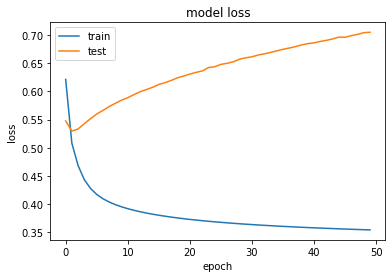

In [21]:
#Membuat plot
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

Visualisasi Plot MSE

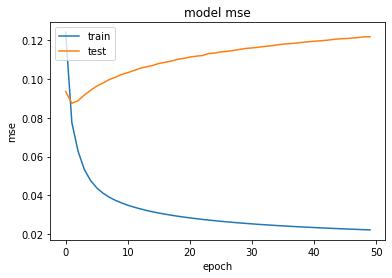

In [22]:
#Membuat plot
plt.plot(history.history["mse"])
plt.plot(history.history["val_mse"])
plt.title("model mse")
plt.ylabel("mse")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

Visualisasi Plot Recall

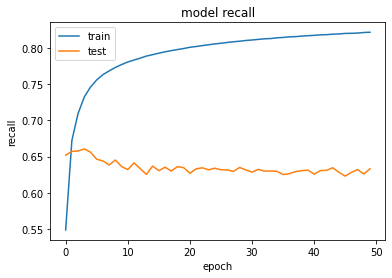

In [23]:
#Membuat plot
plt.plot(history.history["recall"])
plt.plot(history.history["val_recall"])
plt.title("model recall")
plt.ylabel("recall")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

Visualisasi Plot Precision

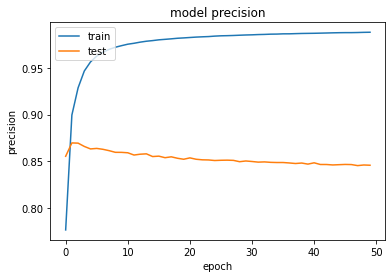

In [24]:
#Membuat plot
plt.plot(history.history["precision"])
plt.plot(history.history["val_precision"])
plt.title("model precision")
plt.ylabel("precision")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

## Load model weights

fungsi load_weights digunakan untuk meload kembali weight model yang sebelumnya 
telah disimpan

In [25]:
def load_weights(name, model):
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    return weights

anime_weights = load_weights('anime_embedding', model)
user_weights = load_weights('user_embedding', model)


Mencari id anime berdasarkan judul dengan menggunakan id baru yang sebelumnya telah dibuat

In [26]:
def getanimedata(anime):
    if isinstance(anime, int):
        return new_animedf[new_animedf.MAL_ID == anime]
    if isinstance(anime, str):
        return new_animedf[new_animedf.Name == anime]

def getanimesynopsis(anime):
    if isinstance(anime, int):
        return anime_synopsis[anime_synopsis.MAL_ID == anime].sypnopsis.values[0]
    if isinstance(anime, str):
        return anime_synopsis[anime_synopsis.Name == anime].sypnopsis.values[0]

# Collaborative Filtering. 

## Tugas 1: Menemukan pengguna serupa (anime yang pernah di rate oleh pengguna)

Kode dibawah digunakan untuk generate random user

In [27]:
print('Generate random user')

rating_by_user = anime_rating.groupby('user_id').size()
random_user = rating_by_user[rating_by_user < 500].sample(1, random_state=None).index[0]
# pake kode dibawah untuk memasukkan id user sesuai keinginan
#random_user = 9878
print('User ID:', random_user)

Generate random user
User ID: 4821


Kode dibawah digunakan untuk mencari tingkat kemiripan user.
1. Tahap awal yang dilakukan adalah load weight dari model dengan embedding user yang sebelumnya telah dibuat.
2. Kemudian setelah weight dari model tersebut di load selanjutnya load weight secara spesifik dengan memasukkan index yang berupa id dari user. kita akan mendapatkan array sebagai outputnya.
3. Menggunakan fungsi .argsort untuk mengurutkn array tersebut. karena fungsi argsort dari numpy mengurutkan nilai atau bobot darikecil ke besar maka disini id yang diambil dari belakang. 
4. Melakukan proses decode dari id user itu dengan menggunakan fungsi yang telah dibuat yaitu fungsi encodetouser untuk mendapatkan id riil dari user tersebut.

In [28]:
def get_similar_users(temp_id, n=10):
      index = temp_id
      encoded_index = encoded_user.get(index)
      weights = user_weights
      dists = np.dot(weights, weights[encoded_index])
      sorted_dists = np.argsort(dists)
      n = n + 1
      closest = sorted_dists[-n:]

      print('User that similar to user #{}'.format(temp_id))
      
      rindex = new_animedf
      Similar_arr = []
      
      for close in closest:
          similarity = dists[closest]

          if isinstance(temp_id, int):
              decoded_id = encodeusertouser.get(close)
              Similar_arr.append({"similar_users": decoded_id, 
                                    "similarity": similarity})

      Frame = pd.DataFrame(Similar_arr)
      
      return Frame

Kode di bawah ini digunakan untuk mencari similar user

In [29]:
similar_users = get_similar_users(int(random_user), 
                                   n=5)

similar_users = similar_users[similar_users.similar_users != random_user]
similar_users.head(5)

User that similar to user #4821


,similar_users,similarity
0,6833,"[0.28304297, 0.28320205, 0.28412625, 0.2858888..."
1,14095,"[0.28304297, 0.28320205, 0.28412625, 0.2858888..."
2,13804,"[0.28304297, 0.28320205, 0.28412625, 0.2858888..."
3,622,"[0.28304297, 0.28320205, 0.28412625, 0.2858888..."
4,1214,"[0.28304297, 0.28320205, 0.28412625, 0.2858888..."


## Menampilkan wordcloud dari genre anime

In [30]:
def showWordCloud(all_genres):
    genres_cloud = WordCloud(width=700, height=400, 
                             background_color='white', 
                             colormap='gnuplot').generate_from_frequencies(all_genres)
    
    plt.figure(figsize=(10,8)) 
    plt.imshow(genres_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Membuat list genre berdasarkan dataframe anime yang dimasukkan.


1.   Load dataframe anime
2.   Perulangan for untuk setiap anime yang ada
3.   Perulangan for untuk memasukkan setiap genre dari anime kedalam temp
4.   Membuat wordcloud dari genre yang ada.



In [31]:

def FavGenre(user_pref_df, plot=False):
        #user_pref_df.dropna(inplace=False)
        all_genre = defaultdict(int)
        temp = []
        for genres in user_pref_df['Genres']:
            if isinstance(genres, str):
                for genre in genres.split(','):
                    temp.append(genre)
                    all_genre[genre.strip()] += 1    
        if plot:
            showWordCloud(all_genre)
        
        return temp


Kode dibawah digunakan untuk menampilkan list rekomendasi anime berdasarkan aktivitas tontonan anime user. 
1.   Mencari data anime apa saja yang telah ditonton oleh user dan memasukkannya kedalam dataframe baru
2.   Mencari nilai terendah dari rating anime
3.   Membuat referensi anime (top_anime_refference) dengan mengurutkan anime berdasarkan rating.
4.   Membuat dataframe baru berdasarkan dataframe utama (new_animedf) dan melakukan seleksi yang mana data yang dimasukkan adalah anime yang termasuk kedalam referensi anime (top_anime_refference)
5.   Menghitung rata-rata rating yang diberikan oleh user
6.   Membuat plot dari genre anime yang berada dalam dataframe baru




In [50]:
def get_user_anime_preference(user_id, plot=False, temp=1):
  already_watched_by_user = anime_rating[anime_rating.user_id==user_id]
  #rating_percentile menentukan batas rating terendah anime
  lowest_rating = np.percentile(already_watched_by_user.rating, 75)
  already_watched_by_user = already_watched_by_user[already_watched_by_user.rating >= lowest_rating]
  top_anime_refference = (
      already_watched_by_user.sort_values(by="rating", ascending=False)#.head(10)
      .anime_id.values
  )
  
  user_pref_df = new_animedf[new_animedf["MAL_ID"].isin(top_anime_refference)]
  user_pref_df = user_pref_df[["MAL_ID","Name", "Genres","Score","Episodes","Premiered"]]
  
  if temp != 0:
      print("User #{} Already Rated {} movies with average rating = {:.1f}".format(
        user_id, len(already_watched_by_user),
        already_watched_by_user['rating'].mean()*10,
      ))
  
      print('Recommended anime genre for user:')
  if plot:
      FavGenre(user_pref_df, plot)       
  return user_pref_df

Menampilkan word cloud dan rekomendasi anime untuk user

User #4821 Already Rated 79 movies with average rating = 8.7
Recommended anime genre for user:


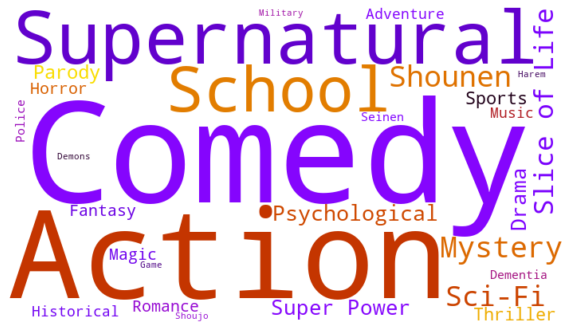

,MAL_ID,Name,Genres,Score,Episodes,Premiered
14306,37510,Mob Psycho 100 II,"Action, Slice of Life, Comedy, Supernatural",8.84,13,Winter 2019
14485,37779,Yakusoku no Neverland,"Sci-Fi, Mystery, Horror, Psychological, Thrill...",8.65,12,Winter 2019
14631,38000,Kimetsu no Yaiba,"Action, Demons, Historical, Shounen, Supernatural",8.62,26,Spring 2019
10451,30276,One Punch Man,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",8.57,12,Fall 2015
11260,32182,Mob Psycho 100,"Action, Slice of Life, Comedy, Supernatural",8.49,12,Summer 2016
7013,13601,Psycho-Pass,"Action, Sci-Fi, Police, Psychological",8.38,22,Fall 2012
11914,33486,Boku no Hero Academia 2nd Season,"Action, Comedy, Super Power, School, Shounen",8.33,25,Spring 2017
13644,36456,Boku no Hero Academia 3rd Season,"Action, Comedy, Super Power, School, Shounen",8.25,25,Spring 2018
10573,30503,Noragami Aragoto,"Action, Adventure, Comedy, Supernatural, Shounen",8.22,13,Fall 2015
770,853,Ouran Koukou Host Club,"Comedy, Harem, Romance, School, Shoujo",8.2,26,Spring 2006


In [51]:
reff_user = get_user_anime_preference(random_user, plot=True)
reff_user=pd.DataFrame(reff_user)
reff_user.head(10)

## Tugas 2 : Merekomendasikan Anime untuk pengguna acak

Get anime rec for user by other user reference.

1.   Melakukan perulangan for untuk mencari preferensi dari anime yang telah ditonton oleh masing-masing user dan disimpan didalam list.
2.   Membuat dataframe baru dengan data dari list anime dari masing-masing user dan sekaligus menghitung tingkat kemunculan dari judul anime tersebut.

3.   Membuat perulangan for untuk mendapatkan data dari masing-masing anime, seperti genre, judul, jumlah episode




In [52]:
def get_anime_by_similar_users(similar_users):
  n=10
  rec_anime = []
  anime_list = []

  for user_id in similar_users.similar_users.values:
      pref_list = get_user_anime_preference(int(user_id), temp=0)
      pref_list = pref_list[~ pref_list.Name.isin(reff_user.Name.values)]
      anime_list.append(pref_list.Name.values)
      
  anime_list = pd.DataFrame(anime_list)
  sorted_list = pd.DataFrame(pd.Series(anime_list.values.ravel()).value_counts()).head(n)

  for i, anime_name in enumerate(sorted_list.index):        
      n_user_pref = sorted_list[sorted_list.index == anime_name].values[0][0]
      if isinstance(anime_name, str):
          
        frame = getanimedata(anime_name)
        anime_id = frame.MAL_ID.values[0]
        genre = frame.Genres.values[0]
        synopsis = getanimesynopsis(int(anime_id))
        rec_anime.append({"anime_id": anime_id ,
                                    "point": n_user_pref,
                                    "Title": anime_name, 
                                    "Genres": genre,
                                    "Sypnopsis": synopsis
                                    })


  return pd.DataFrame(rec_anime)


### Menampilkan top 10 anime


 Top recommendations for user with id: 4821


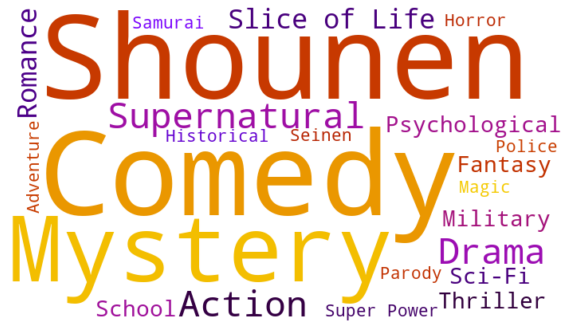

,anime_id,point,Title,Genres,Sypnopsis
0,1535,4,Death Note,"Mystery, Police, Psychological, Supernatural, ...","shinigami, as a god of death, can kill any per..."
1,4181,3,Clannad: After Story,"Slice of Life, Comedy, Supernatural, Drama, Ro...","Clannad: After Story , the sequel to the criti..."
2,9253,3,Steins;Gate,"Thriller, Sci-Fi",The self-proclaimed mad scientist Rintarou Oka...
3,16498,3,Shingeki no Kyojin,"Action, Military, Mystery, Super Power, Drama,...","Centuries ago, mankind was slaughtered to near..."
4,5114,3,Fullmetal Alchemist: Brotherhood,"Action, Military, Adventure, Comedy, Drama, Ma...","""In order for something to be obtained, someth..."
5,22319,3,Tokyo Ghoul,"Action, Mystery, Horror, Psychological, Supern...",Tokyo has become a cruel and merciless city—a ...
6,11013,3,Inu x Boku SS,"Comedy, Supernatural, Romance, Shounen",chiyo Shirakiin is the sheltered daughter of a...
7,918,3,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...","The Amanto, aliens from outer space, have inva..."
8,4224,3,Toradora!,"Slice of Life, Comedy, Romance, School",uuji Takasu is a gentle high school student wi...
9,12189,3,Hyouka,"Mystery, School, Slice of Life",Energy-conservative high school student Houtar...


In [53]:

print('\n Top recommendations for user with id: {}'.format(random_user))
rec_anime = get_anime_by_similar_users(similar_users)
FavGenre(rec_anime, plot=True)
rec_anime

### Membandingkan anime hasil rekomendasi berdasarkan similarity dengan user lain  dengan history tontonan user

In [54]:
#def comparison_rec_user ():
comparison = anime_rating[anime_rating["user_id"]==random_user]
comparison_anime = []
for rec_anime_id in rec_anime['anime_id']:
  for anime_id in comparison['anime_id']:
    if rec_anime_id == anime_id:
      comparison_anime.append({"anime_id": rec_anime_id,
                            "Status" : "Same"
                            })
comparison_anime = pd.DataFrame(comparison_anime)
comparison_anime

,anime_id,Status
0,1535,Same
1,9253,Same
2,16498,Same
3,5114,Same
4,22319,Same
5,918,Same
6,12189,Same


## Evaluasi Model

Metrik Evaluasi yang digunakan yaitu MSE, precision, dan recall

In [55]:
#Evaluasi Model
model.evaluate(X_test_array,y_test)

6250/6250 [==============================] - 26s 4ms/step - loss: 0.5295 - mse: 0.0875 - precision: 0.8695 - recall: 0.6572


[0.5295194983482361,
 0.08753032237291336,
 0.869533896446228,
 0.6572204232215881]

Mencari nilai F-Measure 

In [56]:
precision=0.8699718117713928
recall=0.6532857418060303

#count f_measure
f_measure=2*(precision*recall)/(precision+recall)
print("F Measure =",f_measure)

F Measure = 0.746216789233894


- Nilai MSE yang didapatkan yaitu sebesar 0.0875
- Nilai precission yang didapatkan yaitu sebesar 0.8695
- Nilai recall yang didapatkan yaitu sebesar 0.6572
- Nilai F Measure yang didapatkan yaitu 0.7462

Berikut ini merupakan tabel dari metrik evaluasi dari model diatas :

| Metrik    | Nilai  |
| --------- | ------ |
| MSE       | 0.0875 |
| Precision | 0.8695 |
| Recall    | 0.6572 |
| F-Measure | 0.7462 |
